## Predictive Modeling for Early Breast Cancer Detection Using Logistic Regression

![Breast Cancer Screening](https://news.llu.edu/sites/news.llu.edu/files/styles/crop_featured_image/public/breast_cancer_screening_photo.jpg?itok=eGlfn_j7)


### Business Overview:

Breast cancer remains one of the leading causes of death among women globally, but early detection can significantly improve survival rates and outcomes. In this project, we aim to leverage machine learning, specifically logistic regression, to develop a predictive model that can assist in early breast cancer detection. By using a dataset containing detailed cell measurements and diagnosis outcomes (malignant or benign), we aim to build a model that can predict whether a given cell sample is malignant or benign based on its features. The results could help healthcare professionals make faster and more accurate diagnoses, ultimately leading to better patient outcomes.

### Problem Statement:

Breast cancer is a critical health issue that requires early detection for effective treatment. Manual detection methods, such as biopsies, can be time-consuming and invasive. A machine learning-based approach that can predict malignancy based on cell features offers a non-invasive, faster alternative to assist medical practitioners in decision-making. The problem is to build a logistic regression model capable of accurately predicting whether a given breast cell is malignant based on its measured features, thereby helping to identify potential cancer cases earlier.

### Objectives:

1. Data Preprocessing: Clean the Breast Cancer dataset by removing irrelevant columns, handling missing values, and transforming data where necessary.
2. Feature Engineering: Use appropriate scaling and transformations to ensure the data is in the right format for logistic regression.
3. Model Training: Train a logistic regression model to classify breast cancer diagnoses as malignant or benign based on the available cell features.
4. Model Evaluation: Evaluate the trained model using standard metrics such as accuracy, confusion matrix, classification report, ROC curve, and AUC score.
5. Deployment Readiness: Provide a comprehensive assessment of the model’s accuracy and readiness for potential real-world deployment in healthcare settings.
6. Insights: Generate insights that can help healthcare professionals use the model for early detection of breast cancer, contributing to improved patient outcomes.
### Success Criteria:

1. Model Accuracy: The logistic regression model should achieve a high accuracy rate (e.g., > 90%) in predicting whether a breast cancer cell is malignant or benign.
2. Evaluation Metrics: The model should perform well across all evaluation metrics, including:
Confusion Matrix: Clear distinction between true positives, false positives, true negatives, and false negatives.
Classification Report: High precision, recall, and F1-score for both malignant and benign classifications.
ROC Curve and AUC: AUC value close to 1.0, indicating strong model performance.
3. Interpretability: The model should be interpretable, allowing medical professionals to understand how predictions are made.
4. Real-World Application: The model should be robust and applicable to real-world breast cancer detection, providing a valuable tool for early diagnosis and treatment.

In [255]:
import pandas as pd
import numpy as np
import seaborn as sns

In [256]:
# Load the data
df = pd.read_csv('data.csv', index_col = 0)
if 'Unnamed: 32' in df.columns:
    df = df.drop(columns=['Unnamed: 32'])

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [257]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [258]:
# Statistical description of the dataframe
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


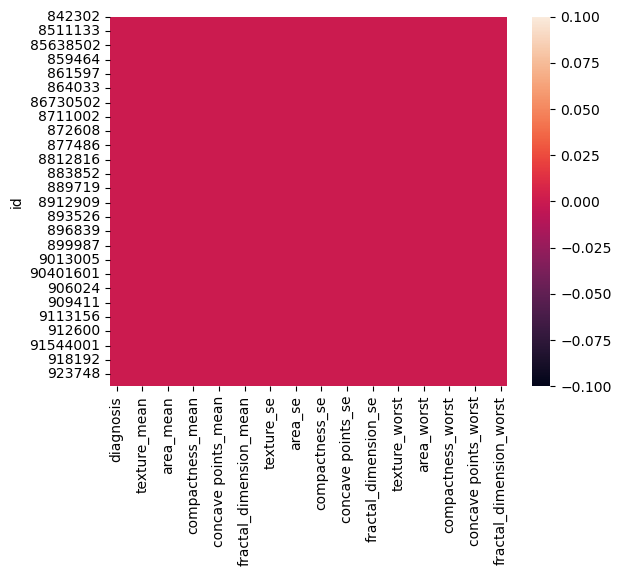

In [259]:
# To check nan vlaues of the data
sns.heatmap(df.isnull());

### Insight
The dataframe contains no missing values

In [261]:
# drop irrelevant column(id)
df = df.reset_index() # reseting id
df = df.drop(columns = ['id'], errors='ignore')

In [262]:
# Convert the 'diagnosis' column to binary (1 for 'M', 0 for others)
df['diagnosis'] = df['diagnosis'].apply(lambda value: 1 if value == 'M' else 0)


In [263]:
# Confirming the output
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


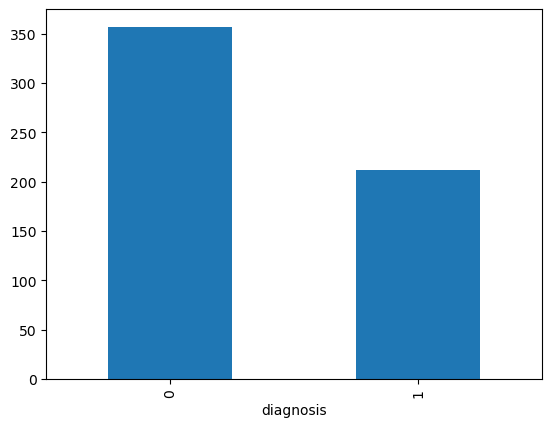

In [264]:
# To confirm the conversion
df['diagnosis'].value_counts().plot(kind = 'bar');

## Modelling

In [266]:
# Defining predictors and target variables
y = df['diagnosis']
X = df.drop(['diagnosis'], axis = 1)

In [267]:
# Split the data using train_test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [268]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit the scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [269]:
# Converting the resulting sets to dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index= X_test.index ,columns=X_test.columns)

In [270]:
# Confirming the data structure
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(455, 30)
(114, 30)


In [271]:
#confirming the shapes are consist
print(y_train.shape)
print(y_test.shape)

(455,)
(114,)


In [272]:
# confirming no missng values
print(X_test_scaled.isnull().sum())

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [273]:
# Train the model
from sklearn.linear_model import LogisticRegression
# Create the model
logr = LogisticRegression()

In [274]:
#Train the model on training data
logr.fit(X_train_scaled, y_train)

LogisticRegression()

In [275]:
# Predict the target variable based on the train and test
y_pred_train = logr.predict(X_train_scaled)
y_pred_test = logr.predict(X_test_scaled)

In [308]:
# Evaluation of the model usinf accuracy score
from sklearn.metrics import accuracy_score

# Calculate accuracy for training and testing
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {accuracy_train:.2f}")
print(f"Test Accuracy: {accuracy_test:.2f}")

Training Accuracy: 0.97
Test Accuracy: 0.98


The model achieved an impressive training accuracy of 97% and a test accuracy of 98%, indicating strong performance and effective generalization to unseen data. This suggests that the logistic regression model is well-trained and capable of accurately predicting whether a cell is malignant or not, with minimal overfitting.

In [310]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print("Training Confusion Matrix:\n", cm_train)
print("Test Confusion Matrix:\n", cm_test)


Training Confusion Matrix:
 [[285   1]
 [ 13 156]]
Test Confusion Matrix:
 [[71  0]
 [ 2 41]]


The training confusion matrix shows 285 true negatives, 1 false positive, 13 false negatives, and 156 true positives, indicating the model performs well but slightly misclassifies a few cases. The test confusion matrix reveals 71 true negatives, 0 false positives, 2 false negatives, and 41 true positives, demonstrating excellent performance with minimal errors on the test data, especially with no false positives.

In [312]:
from sklearn.metrics import classification_report

# Generate classification report
report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)

print("Training Classification Report:\n", report_train)
print("Test Classification Report:\n", report_test)


Training Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       286
           1       0.99      0.92      0.96       169

    accuracy                           0.97       455
   macro avg       0.98      0.96      0.97       455
weighted avg       0.97      0.97      0.97       455

Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



The classification reports show that the model performs excellently, with high precision and recall for both benign (Class 0) and malignant (Class 1) classes. The model achieves 97% accuracy on the training set and 98% accuracy on the test set, indicating strong generalization to new data.

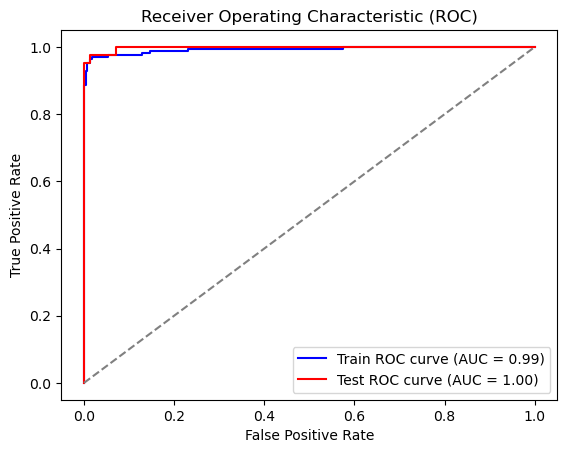

In [314]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, logr.predict_proba(X_train_scaled)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, logr.predict_proba(X_test_scaled)[:, 1])

# Calculate AUC
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', label=f'Test ROC curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### Insights
Training AUC of 0.99 and test AUC of 1.00 suggest that your model is highly effective at distinguishing between the classes, with very strong performance on both the training and test datasets.

### Insights
1. High Precision and Recall: The model exhibits high precision and recall for both classes, meaning it is good at correctly identifying both malignant (Class 1) and benign (Class 0) cells. This suggests that the model can be trusted to correctly classify the majority of cases, both in terms of minimizing false positives (precision) and false negatives (recall).

2. Balanced Performance: The relatively high F1-scores for both classes indicate that the model maintains a good balance between precision and recall. This is important in healthcare settings where both false positives (benign labeled as malignant) and false negatives (malignant labeled as benign) need to be minimized to avoid unnecessary treatments or missed diagnoses.

3. Generalization Ability: The accuracy on the test set (98%) being close to the training accuracy (97%) suggests that the model generalizes well to unseen data, indicating it is not overfitting to the training data.

4. Strong Model Robustness: Given that the model performs well on both the training and test sets, it is robust and reliable for predicting whether a given cell is malignant or benign based on the measurements, which can be useful for early breast cancer detection.






